In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite

%matplotlib inline

In [2]:
url = 'https://github.com/kmlee419/patent_analysis/raw/main/tesla_ipc_new.csv'
df = pd.read_csv(url)

In [3]:
df['code_1'] = df['code'].str[:1]
df['code_2'] = df['code'].str[:3]

### 총 특허 수

In [4]:
len(df['patent'].drop_duplicates())

303

### 총 코드 수

In [5]:
len(df['code'].drop_duplicates())

1973

### 대상년도

In [6]:
print(min(df['date']), max(df['date']))

2016-01-08 2021-06-10


### 연도별 총 특허 수 

In [7]:
df2 = df[['patent', 'year']].drop_duplicates()
group_year = df2.groupby('year')['patent'].count()
group_year = group_year.reset_index()

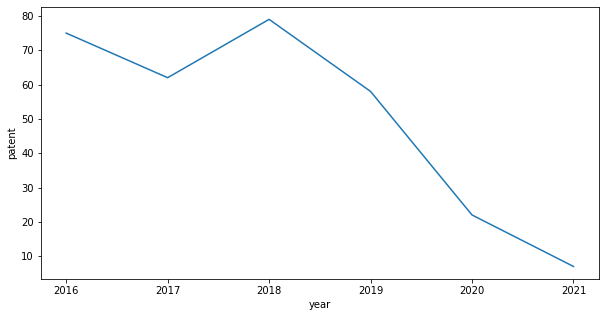

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=group_year, x='year', y='patent')
plt.show()

### 가장 많이 사용된 코드 top N list (세세분류)

In [9]:
year1 = 2016 # 기간설정
year2 = 2021

df_year = df[(df['year']>=year1)&(df['year']<=year2)]
code_count = df_year['code'].value_counts().reset_index()
code_count.head(10) # 순위 개수 바꾸기 가능

,index,code
0,Y02E10/50,58
1,Y02B10/10,54
2,Y02E60/10,36
3,Y02E10/56,26
4,H02J3/381,24
5,Y02E10/47,22
6,H01L31/048,22
7,H02J2300/24,21
8,Y02T10/70,21
9,H02S40/36,18


### 가장 많이 사용된 코드 top N list (대분류 > 중분류 > 세세분류)

In [15]:
year1 = 2016 # 기간설정
year2 = 2021

df_year = df[(df['year']>=year1)&(df['year']<=year2)]
code_count = df_year['code_1'].value_counts().reset_index()
code_count.head(10) # 순위 개수 바꾸기 가능

,index,code_1
0,H,1264
1,B,644
2,Y,506
3,G,443
4,F,247
5,C,153
6,E,117
7,A,8


In [17]:
#대분류 선택
code = 'G'

df_code = df[df['code_1']==code]
code_count = df_code['code_2'].value_counts().reset_index()
code_count.head(10) # 순위 개수 바꾸기 가능

,index,code_2
0,G06,303
1,G01,67
2,G05,44
3,G03,8
4,G07,8
5,G02,4
6,G16,4
7,G08,2
8,G10,2
9,G09,1


In [18]:
#중분류 선택
code = 'G01'

df_code = df[df['code_2']==code]
code_count = df_code['code'].value_counts().reset_index()
code_count.head(10) # 순위 개수 바꾸기 가능

,index,code
0,G01R31/396,4
1,G01R31/382,2
2,G01C21/3697,2
3,G01R31/025,1
4,G01S19/47,1
5,G01C21/3407,1
6,G01C21/206,1
7,G01C21/005,1
8,G01S19/41,1
9,G01S19/14,1


### 코드별 연도변화 (세세분류)

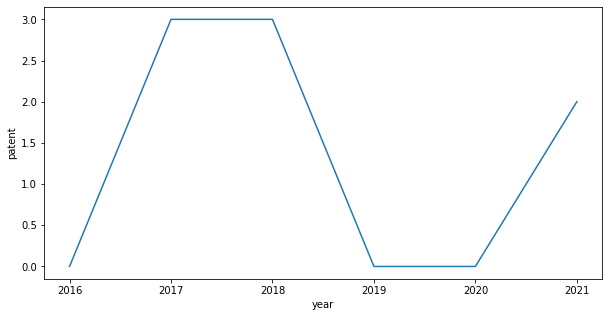

In [12]:
code = 'E04D1/30' # 코드 바꾸기 가능

years = df[['year']].drop_duplicates().sort_values(by='year').reset_index(drop=True)

df_code = df[df['code']==code]
df_code2 = df_code[['patent', 'year']].drop_duplicates()
code_year = df_code2.groupby('year')['patent'].count()
code_year = code_year.reset_index()

code_year2 = pd.merge(years, code_year, on='year', how='left')
code_year2.fillna(0.0, inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=code_year2, x='year', y='patent')
plt.show()

### 코드별 연도변화 (대분류)

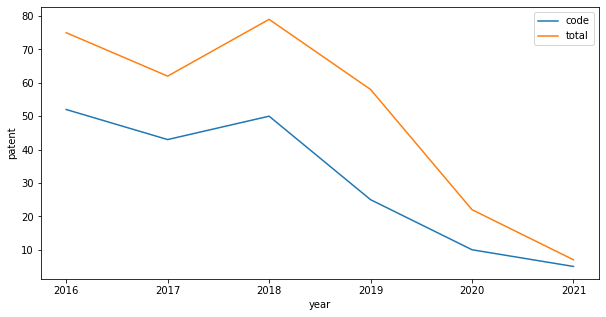

In [13]:
code = 'H' # 코드 바꾸기 가능

years = df[['year']].drop_duplicates().sort_values(by='year').reset_index(drop=True)

df_code = df[df['code_1']==code]
df_code2 = df_code[['patent', 'year']].drop_duplicates()
code_year = df_code2.groupby('year')['patent'].count()
code_year = code_year.reset_index()

code_year2 = pd.merge(years, code_year, on='year', how='left')
code_year2.fillna(0.0, inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=code_year2, x='year', y='patent')
sns.lineplot(data=group_year, x='year', y='patent')
plt.legend(['code', 'total'])

plt.show()

### 코드별 연도변화 (중분류)

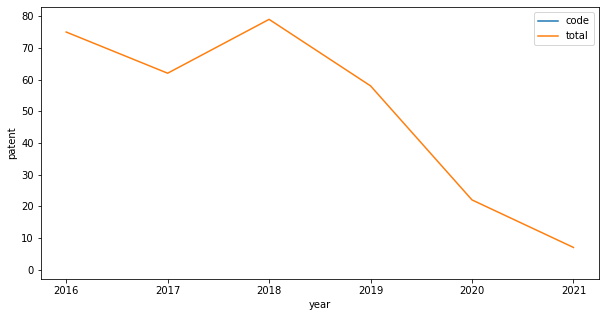

In [14]:
code = 'A47' # 코드 바꾸기 가능

years = df[['year']].drop_duplicates().sort_values(by='year').reset_index(drop=True)

df_code = df[df['code_2']==code]
df_code2 = df_code[['patent', 'year']].drop_duplicates()
code_year = df_code2.groupby('year')['patent'].count()
code_year = code_year.reset_index()

code_year2 = pd.merge(years, code_year, on='year', how='left')
code_year2.fillna(0.0, inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=code_year, x='year', y='patent')
sns.lineplot(data=group_year, x='year', y='patent')
plt.legend(['code', 'total'])

plt.show()

### 코드별 전년대비 변화량 (세세분류)

In [ ]:
years = list(df['year'].drop_duplicates().sort_values())

diff = pd.DataFrame(columns = ['index', 'diff', 'by_year'])
for i in range(0, len(years)-1):
    year1 = years[i]
    year2 = years[i+1]
    
    df_year1 = df[df['year']==year1]
    code_count1 = df_year1['code'].value_counts().reset_index()
    df_year2 = df[df['year']==year2]
    code_count2 = df_year2['code'].value_counts().reset_index()
    
    merge = pd.merge(code_count1, code_count2, on='index', how='outer')
    merge = merge.fillna(0)
    merge['diff'] = merge['code_y'] - merge['code_x']
    merge['by_year'] = str(year1) + "-" + str(year2)
    
    diff = pd.concat([diff, merge[['index', 'diff', 'by_year']]])

In [ ]:
diff.sort_values(by='diff', ascending=False).head(10) # 순위 개수 바꾸기 가능

In [ ]:
# 역순
diff.sort_values(by='diff', ascending=True).head(10) # 순위 개수 바꾸기 가능

### 코드별 전년대비 변화량 (대분류)

In [ ]:
years = list(df['year'].drop_duplicates().sort_values())

diff = pd.DataFrame(columns = ['index', 'diff', 'by_year'])
for i in range(0, len(years)-1):
    year1 = years[i]
    year2 = years[i+1]
    
    df_year1 = df[df['year']==year1]
    code_count1 = df_year1['code_1'].value_counts().reset_index()
    df_year2 = df[df['year']==year2]
    code_count2 = df_year2['code_1'].value_counts().reset_index()
    
    merge = pd.merge(code_count1, code_count2, on='index', how='outer')
    merge = merge.fillna(0)
    merge['diff'] = merge['code_1_y'] - merge['code_1_x']
    merge['by_year'] = str(year1) + "-" + str(year2)
    
    diff = pd.concat([diff, merge[['index', 'diff', 'by_year']]])

In [ ]:
diff.sort_values(by='diff', ascending=False).head(10) # 순위 개수 바꾸기 가능

In [ ]:
# 역순
diff.sort_values(by='diff', ascending=True).head(10) # 순위 개수 바꾸기 가능

### 코드별 전년대비 변화량 (중분류)

In [ ]:
years = list(df['year'].drop_duplicates().sort_values())

diff = pd.DataFrame(columns = ['index', 'diff', 'by_year'])
for i in range(0, len(years)-1):
    year1 = years[i]
    year2 = years[i+1]
    
    df_year1 = df[df['year']==year1]
    code_count1 = df_year1['code_2'].value_counts().reset_index()
    df_year2 = df[df['year']==year2]
    code_count2 = df_year2['code_2'].value_counts().reset_index()
    
    merge = pd.merge(code_count1, code_count2, on='index', how='outer')
    merge = merge.fillna(0)
    merge['diff'] = merge['code_2_y'] - merge['code_2_x']
    merge['by_year'] = str(year1) + "-" + str(year2)
    
    diff = pd.concat([diff, merge[['index', 'diff', 'by_year']]])

In [ ]:
diff.sort_values(by='diff', ascending=False).head(10) # 순위 개수 바꾸기 가능

In [ ]:
# 역순
diff.sort_values(by='diff', ascending=True).head(10) # 순위 개수 바꾸기 가능

### 코드별 연평균 성장률(CAGR) (세세분류)

In [ ]:
df2 = df[['code', 'year', 'patent']].drop_duplicates()
df3 = df2.pivot_table(index='code', columns='year', values='patent', aggfunc=['count'])
df3.fillna(0.001, inplace=True)

In [ ]:
year1 = 2016
year2 = 2021

df3['cagr'] = (df3['count'][year2]/df3['count'][year1])**(1/(year2-year1))-1

In [ ]:
df3.sort_values(by='cagr', ascending=False).head(10)

### 코드별 연평균 성장률(CAGR) (대분류)

In [ ]:
df2 = df[['code_1', 'year', 'patent']].drop_duplicates()
df3 = df2.pivot_table(index='code_1', columns='year', values='patent', aggfunc=['count'])
df3.fillna(0.001, inplace=True)

In [ ]:
year1 = 2016
year2 = 2021

df3['cagr'] = (df3['count'][year2]/df3['count'][year1])**(1/(year2-year1))-1

In [ ]:
df3.sort_values(by='cagr', ascending=False).head(10)

### 코드별 연평균 성장률(CAGR) (중분류)

In [ ]:
df2 = df[['code_2', 'year', 'patent']].drop_duplicates()
df3 = df2.pivot_table(index='code_2', columns='year', values='patent', aggfunc=['count'])
df3.fillna(0.001, inplace=True)

In [ ]:
year1 = 2016
year2 = 2021

df3['cagr'] = (df3['count'][year2]/df3['count'][year1])**(1/(year2-year1))-1

In [ ]:
df3.sort_values(by='cagr', ascending=False).head(10)

### 전체 네트워크 분석

In [ ]:
def network_generation(df):
    U_nodes = list(df['code'].drop_duplicates())
    V_nodes = list(df['patent'].drop_duplicates())
    edgelist = list(zip(df['code'], df['patent']))

    B_df = nx.Graph()
    B_df.add_nodes_from(U_nodes, bipartite=0)
    B_df.add_nodes_from(V_nodes, bipartite=1)

    B_df.add_edges_from(edgelist)
    G = bipartite.collaboration_weighted_projected_graph(B_df, U_nodes)

    return G

In [ ]:
G = network_generation(df)

In [ ]:
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)

nx.set_node_attributes(G, degree, 'degree')
nx.set_node_attributes(G, betweenness, 'betweenness')
nx.set_node_attributes(G, closeness, 'closeness')
nx.set_node_attributes(G, eigenvector, 'eigenvector')

In [ ]:
df_g = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
df_g['dbratio'] = df_g['betweenness'] / df_g['degree']

In [ ]:
# degree 대비 betweenness가 높은 코드 순서로 출력
df_g.sort_values(by='dbratio', ascending=False).head(10)

### 가장 빈도가 높은(낮은) 링크 

In [ ]:
year1 = 2016 # 기간설정
year2 = 2021

df_year = df[(df['year']>=year1)&(df['year']<=year2)]

G = network_generation(df_year)
df_g = nx.to_pandas_edgelist(G)

In [ ]:
df_g.sort_values(by='weight', ascending=False).head(10) # 순위 개수 바꾸기 가능

In [ ]:
df_g.sort_values(by='weight', ascending=True).head(10) # 순위 개수 바꾸기 가능

### 링크별 전년대비 변화량

In [ ]:
years = list(df['year'].drop_duplicates().sort_values())

diff = pd.DataFrame(columns = ['source', 'target', 'diff', 'by_year'])
for i in range(0, len(years)-1):
    year1 = years[i]
    year2 = years[i+1]
    
    df_year1 = df[df['year']==year1]    
    df_year2 = df[df['year']==year2]

    G1 = network_generation(df_year1)
    G2 = network_generation(df_year2)
    
    df_g1 = nx.to_pandas_edgelist(G1)
    df_g2 = nx.to_pandas_edgelist(G2)
    
    df_merge = pd.merge(df_g1, df_g2, on=['source', 'target'], how='outer')
    df_merge = df_merge.fillna(0)
    df_merge['diff'] = df_merge['weight_y'] - df_merge['weight_x']
    df_merge['by_year'] = str(year1) + "-" + str(year2)
    
    diff = pd.concat([diff, df_merge[['source', 'target', 'diff', 'by_year']]])

In [ ]:
diff.sort_values(by='diff', ascending=False).head(20)

### 링크별 연평균 성장률(CAGR)

In [ ]:
year1 = 2016
year2 = 2021

df_year1 = df[df['year']==year1]    
df_year2 = df[df['year']==year2]

G1 = network_generation(df_year1)
G2 = network_generation(df_year2)
    
df_g1 = nx.to_pandas_edgelist(G1)
df_g2 = nx.to_pandas_edgelist(G2)

df_merge = pd.merge(df_g1, df_g2, on=['source', 'target'], how='outer')
df_merge = df_merge.fillna(0.001)
df_merge['cagr'] = (df_merge['weight_y']/df_merge['weight_x'])**(1/(year2-year1))-1

In [ ]:
df_merge.sort_values(by='cagr', ascending=False).head(10) # 순위 개수 바꾸기 가능

### 해당 코드를 포함한 특허 추출

In [ ]:
code = 'G01C21/3697' # 코드 바꾸기 가능

df_code = df[df['code']==code].reset_index(drop=True)
df_code2 = df_code[['patent', 'date']].drop_duplicates().reset_index(drop=True)
df_code2['url'] = 'https://patents.google.com/patent/' + df_code['patent'].str.replace('-', '')

In [ ]:
df_code2

### 복수의 코드를 포함한 특허 추출

In [ ]:
code1 = 'H01M10/613' # 코드 바꾸기 가능
code2 = 'Y02E60/10' # 코드 바꾸기 가능

df_code1 = df[df['code']==code1].reset_index(drop=True)
df_code2 = df[df['code']==code2].reset_index(drop=True)
df_code3 = pd.merge(df_code1, df_code2, on='patent', how='outer')
df_code4 = df_code3[(~df_code3['code_x'].isnull())&(~df_code3['code_y'].isnull())]
df_code5 = df_code4[['patent', 'date_x']].reset_index(drop=True)
df_code5['url'] = 'https://patents.google.com/patent/' + df_code5['patent'].str.replace('-', '')

In [ ]:
df_code5